<a href="https://colab.research.google.com/github/mixhub10/dl16/blob/main/notebook/ch10_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision (CV)

- 영상 안의 물체를 인식하거나 분류하는 것

- CNN은 영상 인식에만 사용되는 것이 아니지만 생물체의 영상 처리 구조에서 힌트를 얻었음

## 영상 인식 시스템의 구조

0. 데이터 읽기
1. 전처리 
2. 특지 추출
3. 분류
4. 분류 결과 추출

## CIFAR_10 영상 분류

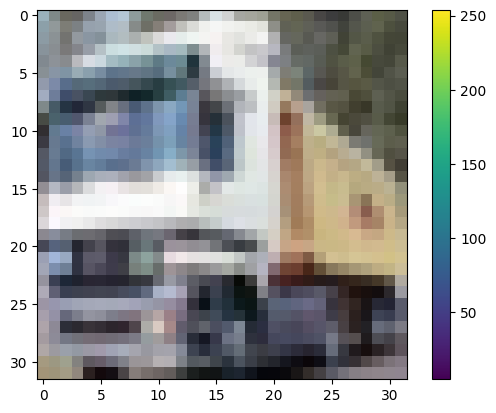

In [ ]:
# import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np

# CFAR-10 데이터 세트를 적재한다.
# 훈련 세트와 테스트 세트를 반환받는다. 
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# 두 번째 영상(트럭)을 화면에 표시한다. 
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()




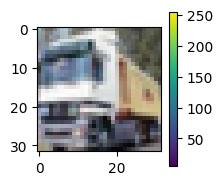

In [ ]:

plt.figure(figsize=(2,2))
plt.imshow(X_train[1])
plt.colorbar()
     

In [ ]:
# 영상의 픽셀 값을 0에서 1 사이로 변환한다. 
X_train = X_train/255.0
X_test = X_test/255.0


In [ ]:
# 순차 모델을 구축한다. 
model = Sequential()
model.add(Conv2D(64, activation = 'relu', kernel_size = (3,3 ), input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3 )))
model.add(Flatten())
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# 모델을 컴파일한다. 
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [ ]:
# 모델을 훈련한다. 
history = model.fit(X_train, y_train, epochs=10, verbose=1, 
                  validation_split=0.3)



Epoch 1/10
1094/1094 [==============================] - 110s 98ms/step - loss: 1.5661 - accuracy: 0.4347 - val_loss: 1.3420 - val_accuracy: 0.5241
Epoch 2/10
1094/1094 [==============================] - 88s 81ms/step - loss: 1.2298 - accuracy: 0.5614 - val_loss: 1.2716 - val_accuracy: 0.5537
Epoch 3/10
1094/1094 [==============================] - 89s 81ms/step - loss: 1.0872 - accuracy: 0.6159 - val_loss: 1.1240 - val_accuracy: 0.6095
Epoch 4/10
1094/1094 [==============================] - 92s 84ms/step - loss: 0.9721 - accuracy: 0.6575 - val_loss: 1.1242 - val_accuracy: 0.6114
Epoch 5/10
1094/1094 [==============================] - 87s 80ms/step - loss: 0.8790 - accuracy: 0.6906 - val_loss: 1.1072 - val_accuracy: 0.6203
Epoch 6/10
1094/1094 [==============================] - 94s 86ms/step - loss: 0.7983 - accuracy: 0.7204 - val_loss: 1.0889 - val_accuracy: 0.6345
Epoch 7/10
1094/1094 [==============================] - 90s 82ms/step - loss: 0.7293 - accuracy: 0.7431 - val_loss: 1.0757 

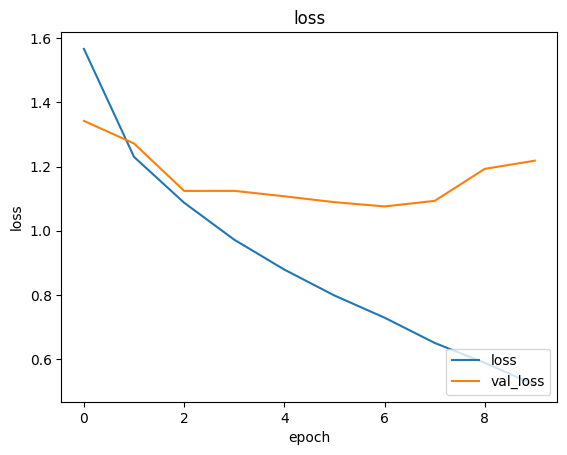

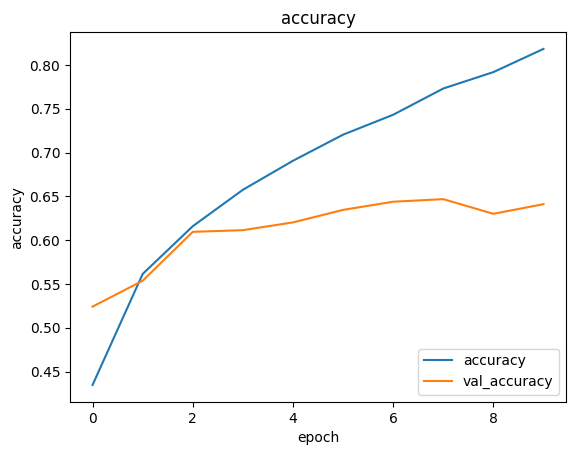

313/313 [==============================] - 6s 18ms/step
정답= [3]
예측값= [8.5412648e-06 1.5966772e-07 2.5155052e-05 8.2078028e-01 6.7718374e-04
 1.7822005e-01 2.2692075e-04 1.0925945e-05 5.0655224e-05 4.6613312e-08] 3
313/313 [==============================] - 6s 19ms/step - loss: 1.2105 - accuracy: 0.6391


[1.2105365991592407, 0.6391000151634216]

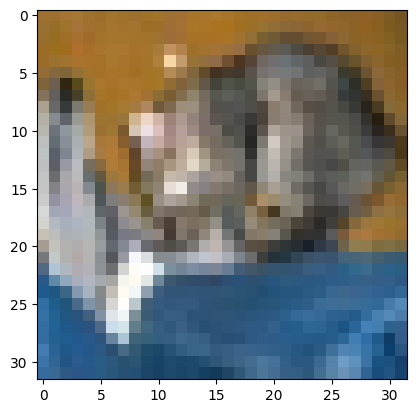

In [ ]:
# 손실값을 그래프로 그린다. 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc = 'lower right')
plt.show()

# 정확도를 그래프로 그린다. 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc = 'lower right')
plt.show()

plt.figure()
plt.imshow(X_test[0])
y_pred = model.predict(X_test)
print("정답=", y_test[0])
print("예측값=", y_pred[0], np.argmax(y_pred[0]))

#################################
# Evaluate the model
#################################
model.evaluate(X_test,y_test)


## 데이터 증대 (data augmentation)

- 한정된 데이터에서 여러 가지로 변형된 데이터를 만들어내는 기법

In [ ]:
#
# https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
#
import matplotlib.pyplot as plt
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image = load_img("dog.jpg")
array = img_to_array(image)
array.shape
sample = expand_dims(array, 0)  # batch image
sample.shape


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255,
    rotation_range=90, brightness_range=[0.8, 1.0],
    width_shift_range=0.2, zoom_range=[0.8, 1.2],
    height_shift_range=0.2)

# rotation_range=90: 회전 한도
# brightness_range=[0.2, 1.0]: 밝기 변형 비율
# width_shift_range=0.2: 좌우 이동 한도
# zoom_range=[0.2, 1.2]: 확대 한도

In [ ]:
obj = datagen.flow(sample, batch_size=1)


In [ ]:
fig = plt.figure(figsize=(20,5))
for i in range(8):
    plt.subplot(1,8,i+1)
    image = obj.next()
    # print(image.shape)
    plt.imshow(image[0])


## 모델 저장

- 가중치를 저장하여 재활용
- Transfer Learning

- 우리는 이미 학습된 모델의 가중치를 저장할 수 있으며, 필요 시 가중치를 불러와서 바로 신경망이 예측을 할 수 있게 함

### 가중치 저장과 복원

- 저장 : model.save("mymodel")
-저장되는 정보
1. 신경망 모델의 아키텍처 및 구성
2. 훈련 중에 학습된 모델의 가중치 값
3. 신경망 모델의 컴파일 정보
4. 옵티마이저와 현재 상태(훈련을 중단한 곳에서 다시 시작하기 위해)
- 복원 : model = load_model("mymodel")

In [ ]:
import numpy as np
import tensorflow as tf
# 난수로 훈련 예제를 만든다.
test_input = np.random.random((128, 32))
test_target = np.random.random((128, 1))
# 입력이 32, 출력이 1 노드인 신경망 모델을 구축한다. 함수형 API를 사용하였다.
inputs = tf.keras.Input(shape=(32,))
outputs = tf.keras.layers.Dense(1)(inputs)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="adam", loss="mean_squared_error")
# 신경망을 3번 훈련시킨다.
model.fit(test_input, test_target, epochs=3)
# 3의 에포크를 수행한 모델을 저장한다.
model.save("my_model")
# 저장된 모델을 불러온다.
saved_model = tf.keras.models.load_model("my_model")
# 저장된 모델을 다시 학습시킨다.
saved_model.fit(test_input, test_target, epochs=3)


## 전이 학습 (Transfer Learning)

- 하나의 문제에 대해 학습한 신경망의 모델과 가중치를 새로운 문제에 적용시키는 것

### resnet50 이용 (예제 1)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')
model.summary()

len(model.layers)

img_path = 'dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))	# 영상 크기를 변경하고 적재한다.
x = image.img_to_array(img)	# 영상을 넘파이 배열로 변환한다. 
x = np.expand_dims(x, axis=0)	# 차원을 하나 늘인다. 배치 크기가 필요하다. 
x = preprocess_input(x)	# ResNet50이 요구하는 전처리를 한다. 

print(x.shape)

preds = model.predict(x)
print('예측:', decode_predictions(preds, top=3)[0])


### cat & dogs : MobileNet (예제)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
# from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam



In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 
preds=Dense(2,activation='softmax')(x) 

model=Model(inputs=base_model.input,outputs=preds)

# Fine-tuning
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

model.summary()


In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) 

train_generator=train_datagen.flow_from_directory('./Petimages/train', 
                                                 target_size=(128,128),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)


model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
model.fit(train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5)



In [ ]:
################################
# Evaluate model on test data
################################
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    './Petimages/test',                      
    target_size=(128, 128), 
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

model.evaluate(test_generator)
# [0.6841789484024048, 0.8949999809265137]
